# Casa: Data Exploration

In [1]:
import os
import sys

path = os.path.abspath('..')
sys.path.append(path)

## Create dataset

In [2]:
import pandas as pd
import seaborn as sns

In [2]:
df_neg = pd.read_csv('./data/comments_negative.csv')
df_pos = pd.read_csv('./data/comments_positive.csv')

In [3]:
print(df_neg.shape)
print(df_pos.shape)

(2000000, 15)
(2000000, 15)


In [4]:
df_neg['label'] = -1
df_pos['label'] = 1

In [5]:
sample_size = 0.10
cols = ['text', 'label']

df_comments = pd.concat([
    df_neg[cols].sample(frac=sample_size), 
    df_pos[cols].sample(frac=sample_size)
]).reset_index(drop=True)

In [7]:
df_comments['text'].isna().sum()
df_comments.dropna(inplace=True)

## Preprocessing & simple feature engineering

In [4]:
from modeling.processing import PreProcessing

In [8]:
def preprocess(text):
    pp = PreProcessing(
        text,
        tokenize=True,
        strip_html=True,
        min_length=1
    )
    return pp.parse()

In [9]:
def get_pos_tags(text):
    pp = PreProcessing(text)
    return pp.get_pos_tags()

In [10]:
def count_capitals(text):
    return sum(1 for c in text if c.isupper())

In [11]:
import swifter

from tqdm import tqdm

tqdm.pandas()

df_comments['pos_tags'] = df_comments['text'].swifter.apply(get_pos_tags)

Pandas Apply:   0%|          | 0/399995 [00:00<?, ?it/s]

In [13]:
df_comments['num_words'] = df_comments['text'].progress_apply(preprocess).apply(len)

Pandas Apply:   0%|          | 0/399995 [00:00<?, ?it/s]

In [15]:
df_comments['num_chars'] = df_comments['text'].progress_apply(len)

Pandas Apply:   0%|          | 0/399995 [00:00<?, ?it/s]

In [16]:
df_comments.to_csv('./data/df_comments.csv')

In [17]:
df_comments['num_capitals'] = df_comments['text'].progress_apply(count_capitals)

Pandas Apply:   0%|          | 0/399995 [00:00<?, ?it/s]

In [19]:
from collections import Counter

df_comments = df_comments.join(
    df_comments['pos_tags'].dropna().apply(Counter).apply(pd.Series).fillna(0),
)

In [25]:
df_comments.tail()

,text,label,pos_tags,num_words,num_chars,num_capitals,PROPN,PUNCT,CCONJ,ADV,...,DET,ADP,PART,VERB,SCONJ,SPACE,INTJ,NUM,SYM,X
399995,"Yeah, were not psychics!\n\nBut you could go t...",1,"[INTJ, PUNCT, AUX, PART, NOUN, PUNCT, SPACE, C...",34,174,3,0.0,4.0,3.0,0.0,...,5.0,5.0,2.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0
399996,"60% of the time, Zoidberg works every time.",1,"[NUM, NOUN, ADP, DET, NOUN, PUNCT, PROPN, VERB...",8,43,1,1.0,2.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
399997,the latter,1,"[DET, ADJ]",2,10,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399998,Broltron?,1,"[PROPN, PUNCT]",1,9,1,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399999,1. You can't make something from nothing\n\n2....,1,"[X, PUNCT, PRON, VERB, PART, VERB, PRON, ADP, ...",51,313,6,0.0,13.0,1.0,7.0,...,1.0,2.0,4.0,11.0,2.0,3.0,1.0,4.0,0.0,1.0


## Plots

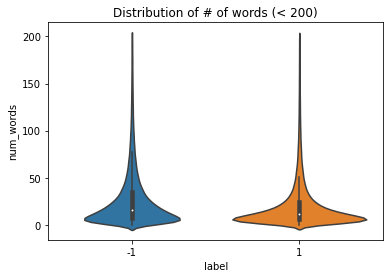

In [21]:
ax = sns.violinplot(x="label", y="num_words", data=df_comments[df_comments['num_words'] < 200]);
ax.set_title('Distribution of # of words (< 200)');

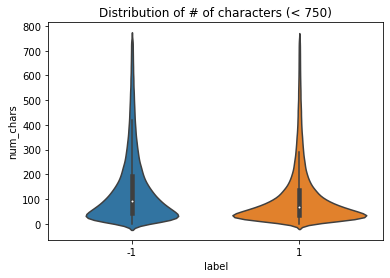

In [22]:
ax = sns.violinplot(x="label", y="num_chars", data=df_comments[df_comments['num_chars'] < 750]);
ax.set_title('Distribution of # of characters (< 750)');

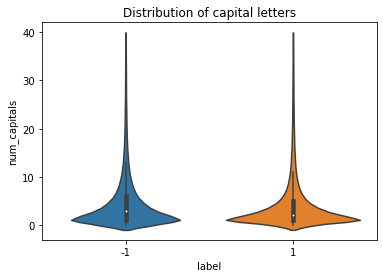

In [23]:
ax = sns.violinplot(x="label", y="num_capitals", data=df_comments[df_comments['num_capitals'] < 40]);
ax.set_title('Distribution of capital letters');

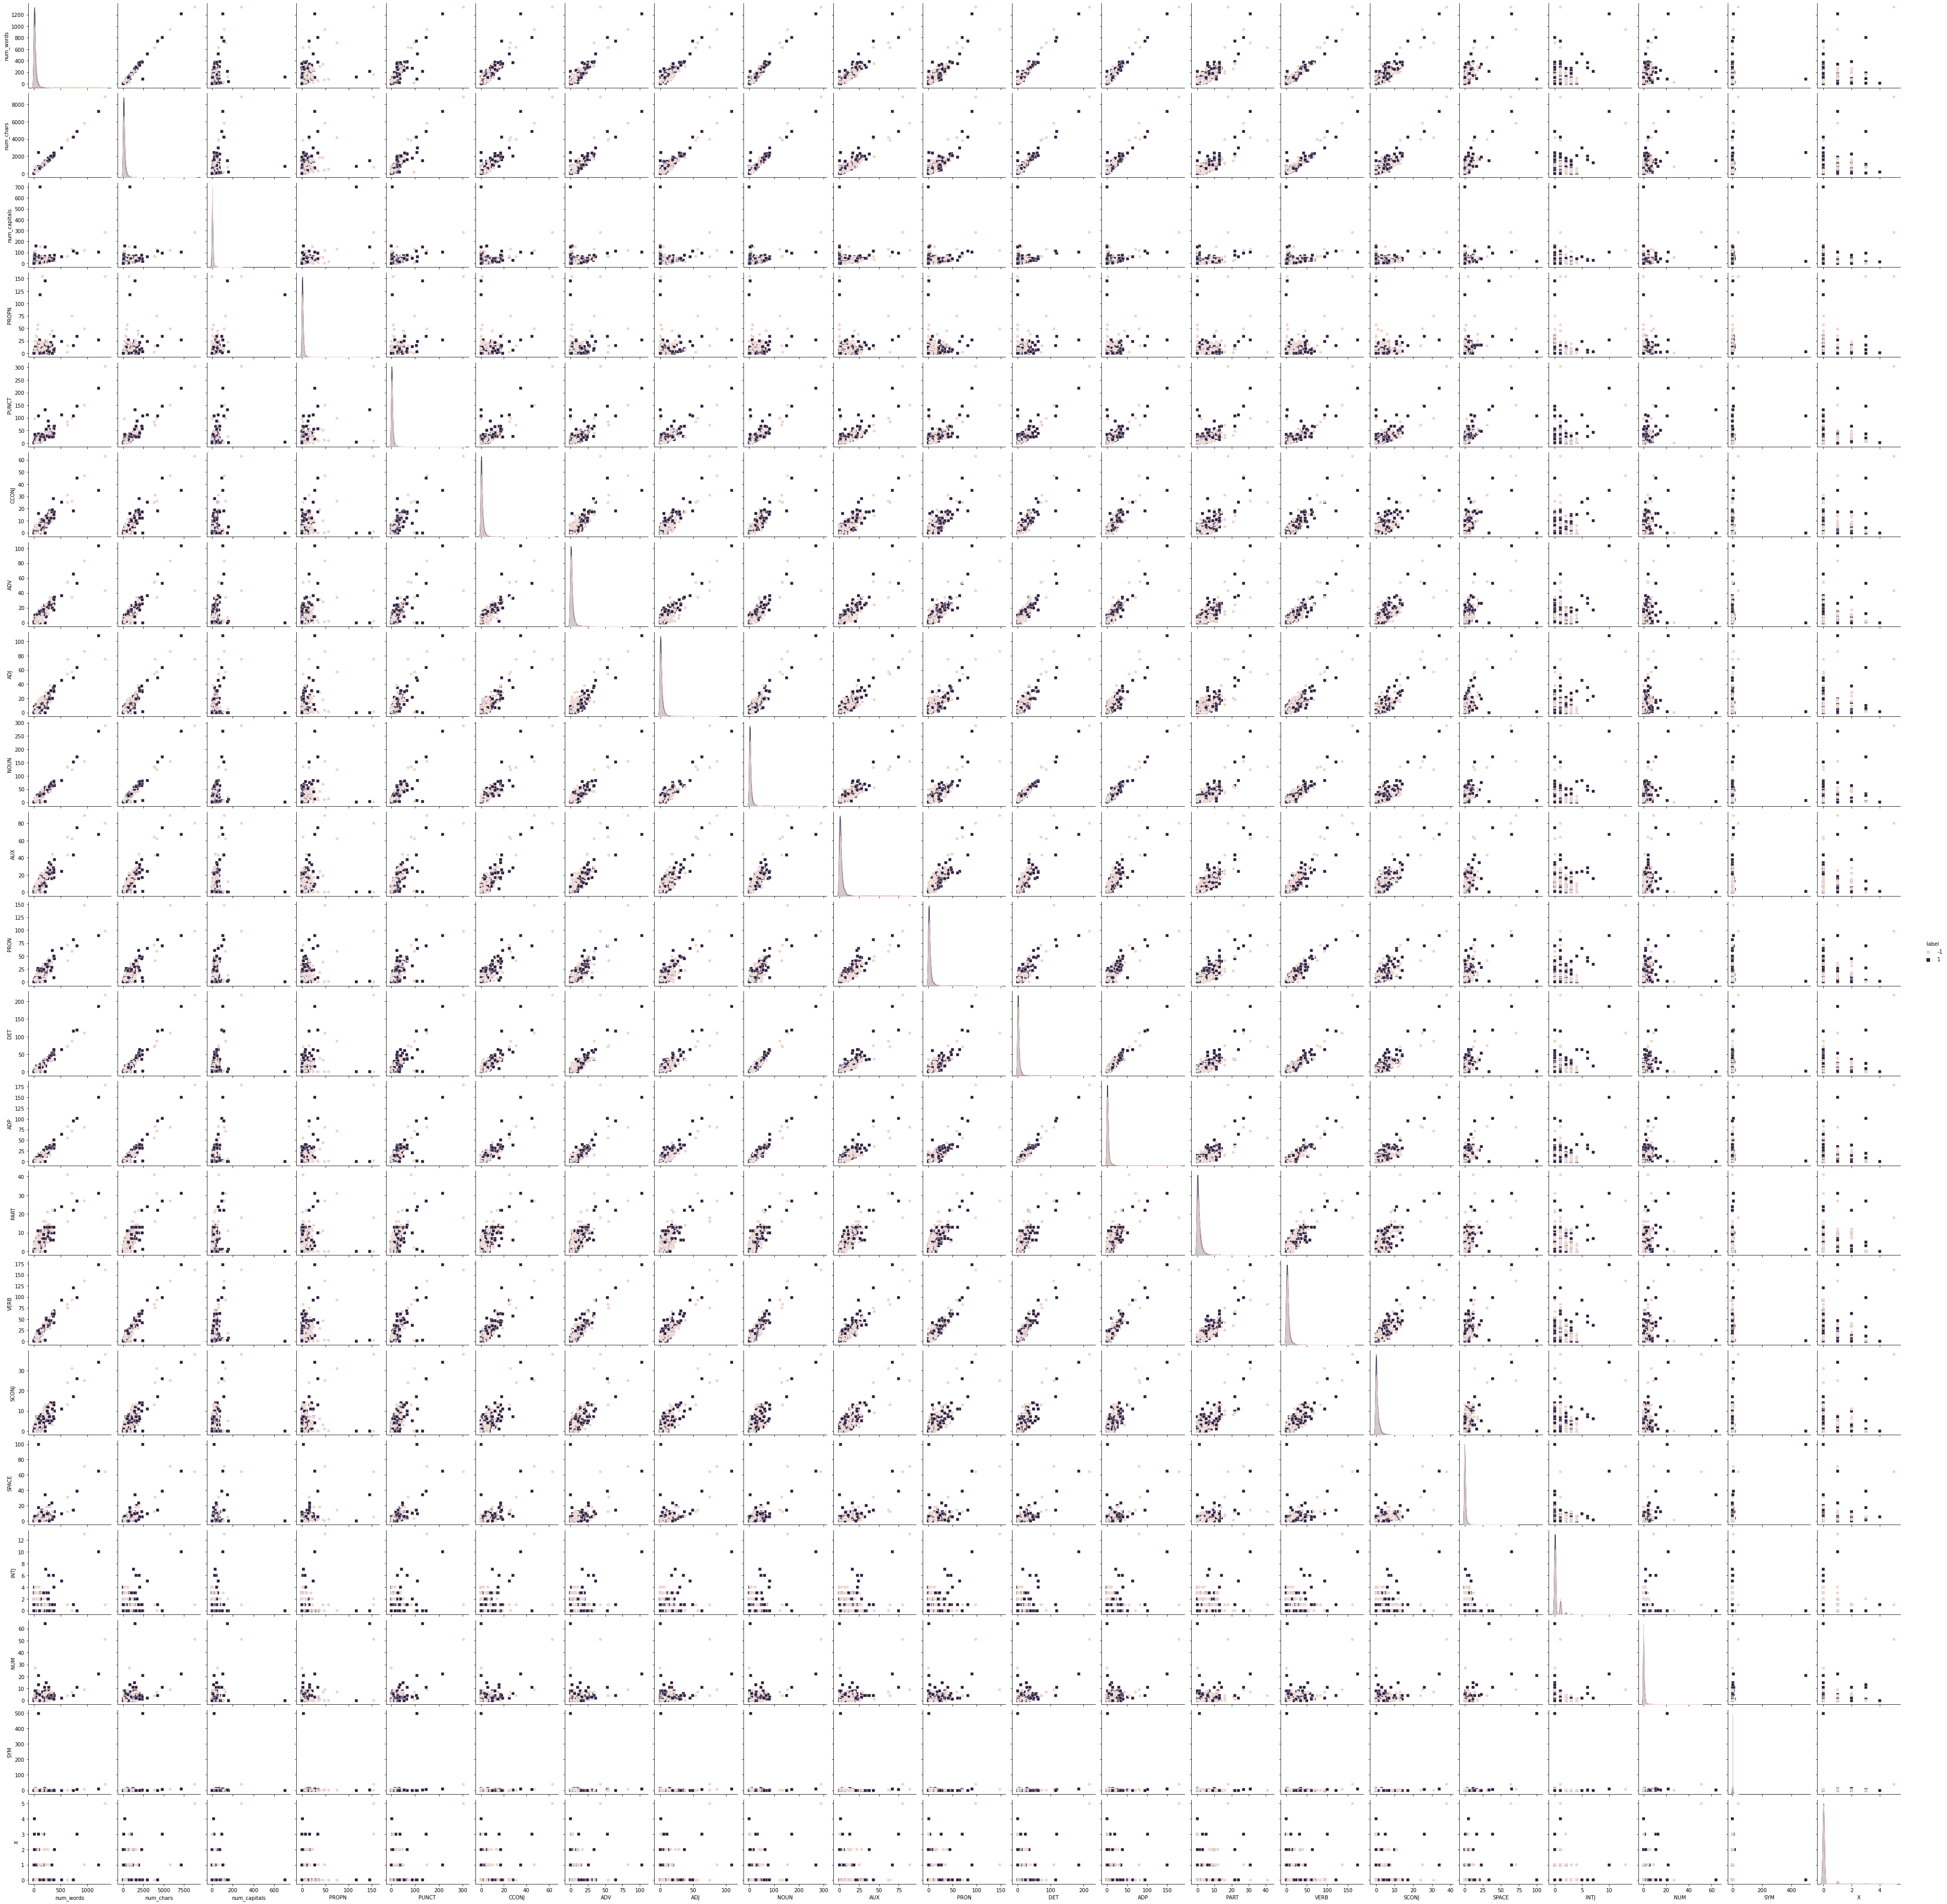

In [27]:
sns.pairplot(df_comments.sample(frac=0.01), hue="label", markers=["o", "s"])